# Study of the time performances of the trajectory generation optimization algorithm, using motion primitives

In [1]:
import numpy as np, matplotlib.pyplot as plt
# Time duration to compute one optimized motion primitive (in ms)
# Case 1 : (5, 0) => (-5, -7.5)
# Case 2 : (0, 0) => (-5, -7.5)

# Case 1 | in C++
data1 = np.array([7, 12, 2, 7, 16, 10, 9, 7, 9, 9, 6])

# Case 2 | in C++
data2 = np.array([14, 9, 8, 8, 6, 6, 6, 9, 2, 6])

# Case 1 | in Python Brent's method
data3 = np.array([65.8, 51.1, 51.1, 51.8, 64.9, 55.9, 51.4, 47.7, 44.1, 65.7])

# Case 2 | in Python Brent's method
data4 = np.array([14.1, 56.0, 88.9, 58.4, 59.6, 67.0, 59.6, 49.5, 50.1, 49.4])

# Case 1 | in Python naive library optimization
data5 = np.array([449, 546, 490, 450, 375, 263, 301, 351, 329, 286, 385, 403, 358])

# Case 2 | in Python naive library optimization
data6 = np.array([457, 493, 340, 298, 380, 316, 386, 286])

In [2]:
cpp = np.concatenate((data1, data2))
pybrent = np.concatenate((data3, data4))
pynaive = np.concatenate((data5, data6))
print('Naive implementation:\n\tTrajectories: {}\n\tMean: {:2.3f}\n\tMedian: {:2.3f}\n\tσ: {:2.3f}'.format(len(pynaive), np.mean(pynaive), np.median(pynaive), np.std(pynaive)))
print('Python Brent:\n\tTrajectories: {}\n\tMean: {:2.3f}\n\tMedian: {:2.3f}\n\tσ: {:2.3f}'.format(len(pybrent), np.mean(pybrent), np.median(pybrent), np.std(pybrent)))
print('C++ Brent:\n\tTrajectories: {}\n\tMean: {:2.3f}\n\tMedian: {:2.3f}\n\tσ: {:2.3f}'.format(len(pynaive), np.mean(cpp), np.median(cpp), np.std(cpp)))


Naive implementation:
	Trajectories: 21
	Mean: 378.190
	Median: 375.000
	σ: 76.379
Python Brent:
	Trajectories: 20
	Mean: 55.105
	Median: 53.850
	σ: 13.531
C++ Brent:
	Trajectories: 21
	Mean: 8.000
	Median: 8.000
	σ: 3.237


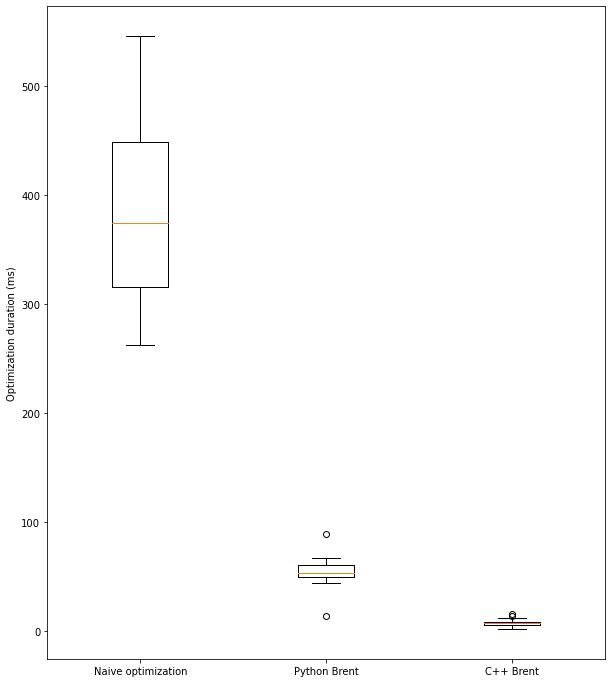

In [13]:
plt.figure(figsize=(10,12))
plt.boxplot([pynaive, pybrent, cpp], labels=['Naive optimization', 'Python Brent', 'C++ Brent'])
plt.ylabel('Optimization duration (ms)')
plt.title('Comparison of ')
plt.savefig('time_all.png', bbox_inches='tight')

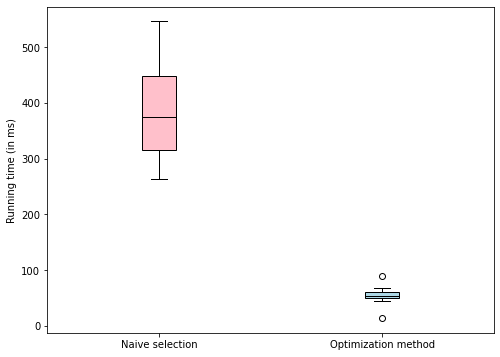

In [8]:
plt.figure(figsize=(8,6))
bplot = plt.boxplot([pynaive, pybrent], labels=['Naive selection', 'Optimization method'], patch_artist=True, medianprops=dict(color='k'))
bplot['boxes'][0].set_facecolor('pink')
bplot['boxes'][1].set_facecolor('lightblue')
plt.ylabel('Running time (in ms)')
plt.savefig('naive_vs_brent.png', bbox_inches='tight', dpi=150)

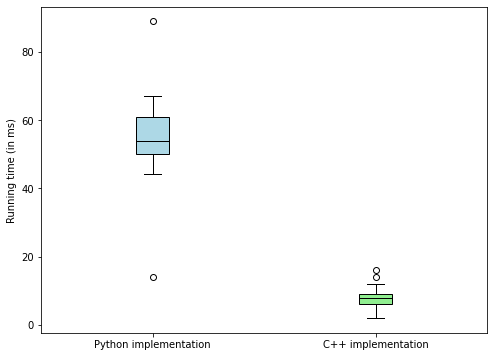

In [9]:
plt.figure(figsize=(8,6))
bplot = plt.boxplot([pybrent, cpp], labels=['Python implementation', 'C++ implementation'], patch_artist=True, medianprops=dict(color='k'))
bplot['boxes'][0].set_facecolor('lightblue')
bplot['boxes'][1].set_facecolor('lightgreen')
plt.ylabel('Running time (in ms)')
plt.savefig('cpp.png', bbox_inches='tight', dpi=150)

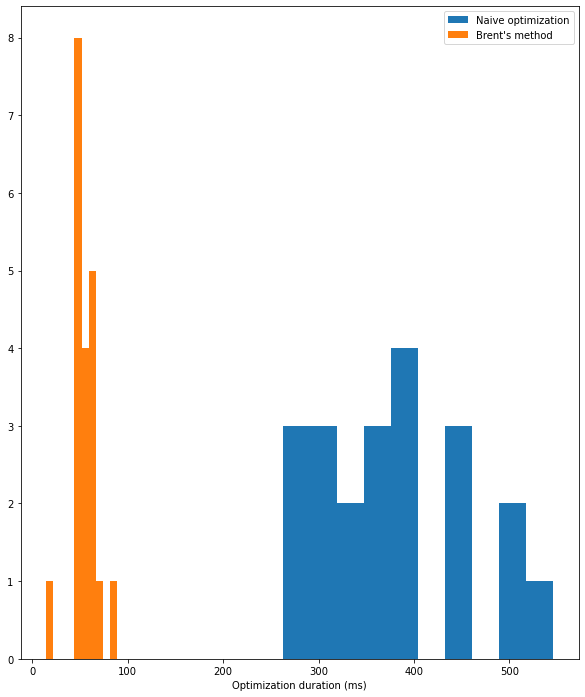

In [10]:
plt.figure(figsize=(10,12))
plt.hist(pynaive, 10, label='Naive optimization')
plt.hist(pybrent, 10, label='Brent\'s method')
plt.xlabel('Optimization duration (ms)')
plt.legend()
#plt.savefig('time_1.png', bbox_inches='tight')